# 1. import and install dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
try:
    import mediapipe
    print("MediaPipe is still installed.")
except ImportError:
    print("MediaPipe is not installed.")


MediaPipe is still installed.


# 2. keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [ ]:
mp_drawing.draw_landmarks??

In [ ]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
        
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [ ]:
# mp_holistic.POSE_CONNECTIONS

In [8]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
    
        # show to screen
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

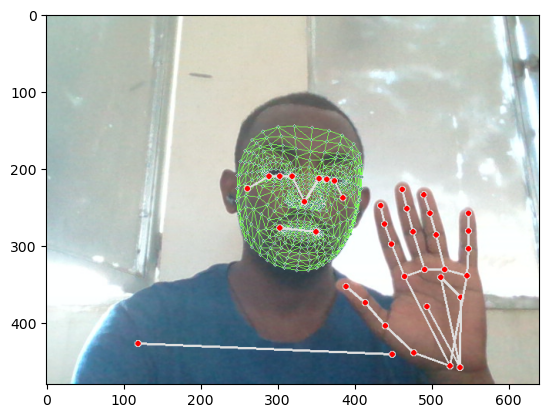

In [8]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [ ]:
# print(results)

In [ ]:
# draw_landmarks(frame, results)

In [ ]:
# cv2.cvtColor??

In [ ]:
# plt.imshow(frame)

# 3. Extract key point values

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
len(pose)

33

In [12]:
pose[0]

array([ 0.52350163,  0.5070945 , -1.08887267,  0.99998271])

In [13]:
len(results.face_landmarks.landmark)*3

1404

In [14]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x,res.y,res.z])
    face.append(test)

In [15]:
len(face)

468

In [16]:
results.pose_landmarks.landmark

[x: 0.52350163
y: 0.5070945
z: -1.0888727
visibility: 0.9999827
, x: 0.5537954
y: 0.4439296
z: -0.9843278
visibility: 0.9999583
, x: 0.570155
y: 0.4463413
z: -0.98423135
visibility: 0.9999663
, x: 0.5854749
y: 0.45056012
z: -0.98324525
visibility: 0.999955
, x: 0.49846283
y: 0.4395155
z: -1.0162842
visibility: 0.99995524
, x: 0.47486377
y: 0.43849894
z: -1.0152808
visibility: 0.9999562
, x: 0.45281458
y: 0.43789202
z: -1.0157762
visibility: 0.99994326
, x: 0.60173285
y: 0.4977575
z: -0.4802372
visibility: 0.9999497
, x: 0.40892348
y: 0.47196415
z: -0.62035084
visibility: 0.9999663
, x: 0.5482421
y: 0.58923036
z: -0.909258
visibility: 0.99996495
, x: 0.47472587
y: 0.5781925
z: -0.9520675
visibility: 0.9999757
, x: 0.70271415
y: 0.92051756
z: -0.23610044
visibility: 0.9991952
, x: 0.1872036
y: 0.89028764
z: -0.40302292
visibility: 0.99617344
, x: 0.94019043
y: 1.3788704
z: -0.9244663
visibility: 0.6028906
, x: 0.038273983
y: 1.4601607
z: -0.3868573
visibility: 0.14186665
, x: 0.83919084


In [17]:
results.face_landmarks.landmark

[x: 0.5242527
y: 0.56175876
z: -0.041072324
, x: 0.5315051
y: 0.50649154
z: -0.05926469
, x: 0.5270776
y: 0.5267874
z: -0.034887686
, x: 0.5227686
y: 0.45997342
z: -0.04009866
, x: 0.5329335
y: 0.49076912
z: -0.0613823
, x: 0.533309
y: 0.4726032
z: -0.054825492
, x: 0.53289264
y: 0.4315672
z: -0.018420875
, x: 0.44523588
y: 0.42788148
z: 0.015039816
, x: 0.5347722
y: 0.3939867
z: -0.0068259607
, x: 0.53661394
y: 0.37257126
z: -0.0061659925
, x: 0.5398039
y: 0.3073347
z: 0.015793715
, x: 0.5234488
y: 0.5697584
z: -0.040405314
, x: 0.5223109
y: 0.57705534
z: -0.037025616
, x: 0.52126974
y: 0.5810753
z: -0.032472175
, x: 0.52037174
y: 0.5884818
z: -0.031593185
, x: 0.52005595
y: 0.59538674
z: -0.033899806
, x: 0.5192964
y: 0.6043745
z: -0.036614407
, x: 0.5181757
y: 0.6142175
z: -0.035439838
, x: 0.51568496
y: 0.62930155
z: -0.025811959
, x: 0.52987134
y: 0.51560384
z: -0.05461246
, x: 0.51831883
y: 0.51548696
z: -0.04134183
, x: 0.4031276
y: 0.36918014
z: 0.07229348
, x: 0.47686452
y: 0.

In [18]:
pose = np.array([[res.x, res.y, res.z, res.visibility]
                for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z]
                for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [20]:
lh = np.array([[res.x, res.y, res.z]
                for res in results.left_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
                

In [ ]:
lh

In [21]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
rh = np.array([[res.x, res.y, res.z]
                for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
rh

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
 extract_keypoints(results)[:-10]

array([ 0.52350163,  0.5070945 , -1.08887267, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
468*3+33*4+21*3+21*3

1662

4. Setup Folders for Collection

In [14]:
DATA_PATH = os.path.join('MP_Data') # path for exported numpy array
# Data_PATH = "C:/Users/Elias/Desktop/Project-Feb to/ESLT-1/MP_DATA"
actions = np.array(['hello', 'thanks', 'ilove you']) #action try to detact
no_sequences = 30 # Thirty videos of worth data
sequence_length = 30 # videos are going to be 30 frame in lenght

In [15]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoints Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
   
   # Loop through actions
    for action in actions:
        # Loop through sequences in videos
        for sequence in range(no_sequences):
            # Loop through video length data sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
                
                #make detaction 
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_styled_landmarks(image,results)
                
                #Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    #show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                        
                    # show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully  
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and Features

In [7]:
import tensorflow as tf

In [8]:
tf.__version__

'2.15.0'

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map

{'hello': 0, 'thanks': 1, 'ilove you': 2}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(labels).shape

(90,)

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(window).shape

(30, 1662)

In [30]:
x = np.array(sequences)

In [31]:
x.shape

(90, 30, 1662)

In [32]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [33]:
y = to_categorical(labels).astype(int)

In [19]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [35]:
x_test.shape

(5, 30, 1662)

In [36]:
x_train.shape

(85, 30, 1662)

In [37]:
y_test.shape

(5, 3)

In [38]:
y_train.shape

(85, 3)

7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [38]:
x.shape

(90, 30, 1662)

In [39]:
actions.shape[0]

3

In [40]:
res = [.1, 0.2, 0.1]

In [41]:
np.argmax(res)

1

In [42]:
actions[np.argmax(res)]

'thanks'

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 15s 102ms/step - loss: 6.9877 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 91ms/step - loss: 8.5452 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 87ms/step - loss: 5.3690 - categorical_accuracy: 0.2118
Epoch 4/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.8098 - categorical_accuracy: 0.2706
Epoch 5/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.4214 - categorical_accuracy: 0.2706
Epoch 6/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.2287 - categorical_accuracy: 0.2118
Epoch 7/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.6717 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.2274 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.3512 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 92ms/step - loss: 0.5462 - categorical_accuracy: 0.7059
Epoch 142/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0896 - categorical_accuracy: 0.6588
Epoch 143/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.7830 - categorical_accuracy: 0.6588
Epoch 144/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7477 - categorical_accuracy: 0.6353
Epoch 145/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.8202 - categorical_accuracy: 0.7529
Epoch 146/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.2068 - categorical_accuracy: 0.7059
Epoch 147/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.8308 - categorical_accuracy: 0.6706
Epoch 148/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.1208 - categorical_accuracy: 0.5765
Epoch 149/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.4806 - categorical_accuracy: 0.729

3/3 [==============================] - 0s 96ms/step - loss: 0.0964 - categorical_accuracy: 0.9647
Epoch 286/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1045 - categorical_accuracy: 0.9529
Epoch 287/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0939 - categorical_accuracy: 0.9647
Epoch 288/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1059 - categorical_accuracy: 0.9647
Epoch 289/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0983 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0993 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0974 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1151 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.1176 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 95ms/step - loss: 0.1434 - categorical_accuracy: 0.9529
Epoch 430/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1976 - categorical_accuracy: 0.9059
Epoch 431/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4783 - categorical_accuracy: 0.8588
Epoch 432/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4665 - categorical_accuracy: 0.8471
Epoch 433/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.4995 - categorical_accuracy: 0.6353
Epoch 434/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4126 - categorical_accuracy: 0.8706
Epoch 435/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0608 - categorical_accuracy: 0.7176
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3199 - categorical_accuracy: 0.6706
Epoch 437/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.8251 - categorical_accuracy: 0.52

3/3 [==============================] - 0s 100ms/step - loss: 0.1243 - categorical_accuracy: 0.9647
Epoch 574/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.2143 - categorical_accuracy: 0.9529
Epoch 575/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2807 - categorical_accuracy: 0.8941
Epoch 576/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.5023 - categorical_accuracy: 0.9176
Epoch 577/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8759 - categorical_accuracy: 0.8941
Epoch 578/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0427 - categorical_accuracy: 0.8235
Epoch 579/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0797 - categorical_accuracy: 0.9059
Epoch 580/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4304 - categorical_accuracy: 0.9412
Epoch 581/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.9726 - categorical_accuracy: 0.8

3/3 [==============================] - 0s 86ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0021 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0021 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 80ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0014 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 92ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.8057e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 97ms/step - loss: 9.7672e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 94ms/step - loss: 9.9451e-04 - categor

3/3 [==============================] - 0s 100ms/step - loss: 7.5543e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.1721e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.5287e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.7035e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.0332e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 96ms/step - loss: 7.8967e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 98ms/step - loss: 7.8184e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 93ms/step - loss: 7.6214e-04 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 97ms/step - loss: 6.1448e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.1313e-04 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.1138e-04 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1030e-04 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 93ms/step - loss: 5.9946e-04 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.9951e-04 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.0483e-04 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 88ms/step - loss: 6.0833e-04 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 65ms/step - l

3/3 [==============================] - 0s 95ms/step - loss: 4.8516e-04 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 94ms/step - loss: 4.8104e-04 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 98ms/step - loss: 4.8231e-04 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.8423e-04 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8064e-04 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.7853e-04 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.8193e-04 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 91ms/step - lo

3/3 [==============================] - 0s 95ms/step - loss: 3.8248e-04 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.8507e-04 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.8926e-04 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 101ms/step - loss: 3.8596e-04 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 92ms/step - loss: 3.8641e-04 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.8655e-04 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 73ms/step - loss: 3.8333e-04 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.8032e-04 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 67ms/step - l

3/3 [==============================] - 0s 86ms/step - loss: 3.1210e-04 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.0870e-04 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0862e-04 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 69ms/step - loss: 3.1381e-04 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.0835e-04 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.0532e-04 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.1065e-04 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.0741e-04 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 99ms/step - l

3/3 [==============================] - 0s 96ms/step - loss: 2.4692e-04 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.4693e-04 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4727e-04 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.5246e-04 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.4832e-04 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.4516e-04 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.4677e-04 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4831e-04 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 94ms/step - 

3/3 [==============================] - 0s 75ms/step - loss: 1.9966e-04 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.9942e-04 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.9897e-04 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9589e-04 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.9809e-04 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.9710e-04 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.9783e-04 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9634e-04 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 100ms/ste

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

8. Make Predictions

In [43]:
model.predict(x_test)

1/1 [==============================] - 1s 817ms/step


array([[0.37780797, 0.27371225, 0.3484798 ],
       [0.38272044, 0.27722272, 0.34005687],
       [0.3754717 , 0.28627154, 0.3382568 ],
       [0.37343282, 0.27184105, 0.35472617],
       [0.37307498, 0.27130583, 0.35561916]], dtype=float32)

In [44]:
res = model.predict(x_test)

1/1 [==============================] - 0s 45ms/step


In [45]:
res[0].shape

(3,)

In [46]:
actions[np.argmax(res[4])]

'hello'

In [47]:
actions[np.argmax(y_test[4])]

'hello'

9. Save Weights

In [60]:
model.save('action.h5')

C:\Users\Elias\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
del model

In [54]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 36ms/step


In [61]:
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)

1.0

In [102]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
                                                                    
    return output_frame
                                                                    

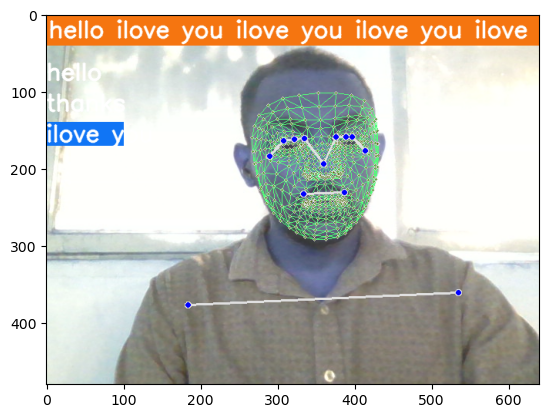

In [114]:
plt.imshow(prob_viz(res, actions, image, colors))

11. Test in Real Time

In [119]:
# 1. New detaction variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)

#set mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        #make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image,results)
        
        
        #2. prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # Viz Logic
            
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    
                    if len(sentence) > 0:
                        if action[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                        
            if len(sentence) > 5:
                sentence = sentence[-5:]

        
        
            
        # viz probabilities
        image = prob_viz(res, actions, image, colors)
                
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
       
    
        # show to screen
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'media

1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'media

1/1 [==============================] - 0s 17ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 10ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'media

1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapi

1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediap

1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ilove you
<class 'med

In [85]:
res[np.argmax(res)] > threshold

True

In [120]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
np.expand_dims(x_test[0], axis=0)

In [ ]:
model.predict(np.expand_dims(x_test[0], axis=0))